<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [32]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

In [33]:
# datos
data=pd.read_csv('data/cookie_cats.csv')

data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [59]:
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [60]:
# transformacion
control= data[data['version']=='gate_30']
tratamiento=data[data['version']=='gate_40']

In [72]:
#control(gate_30)
#retention 1 dia
control_retention_1_si = control[control.retention_1 == True]
control_retention_1_no = control[control.retention_1 == False]
#retencion 7 dias
control_retention_7_si = control[control.retention_7 == True]
control_retention_7_no = control[control.retention_7 == False]

In [78]:
#Tratamiento(gate_40)
#retention 1 dia
tratamiento_retention_1_si = tratamiento[tratamiento.retention_1 == True]
tratamiento_retention_1_no = tratamiento[tratamiento.retention_1 == False]
#retencion 7 dias
tratamiento_retention_7_si = tratamiento[tratamiento.retention_7 == True]
tratamiento_retention_7_no = tratamiento[tratamiento.retention_7 == False]

In [83]:
# testeo para retention_1

from scipy.stats import beta
#beta control
beta_control_retention_1 = beta(len(control_retention_1_si) + 1, len(control_retention_1_no) + 1)
#beta tratamiento
beta_tratamiento_retention_1 = beta(len(tratamiento_retention_1_si) + 1, len(tratamiento_retention_1_no) + 1)

In [92]:
x=np.linspace(0.42, 0.48, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

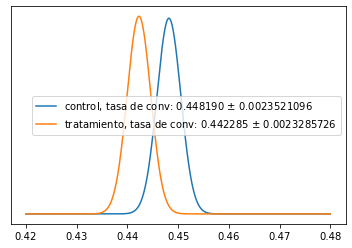

In [93]:
plot([beta_control_retention_1, beta_tratamiento_retention_1], ['control', 'tratamiento'])

In [162]:
salto_ret1=(beta_tratamiento_retention_1.mean() - beta_control_retention_1.mean())/beta_control_retention_1.mean()
salto_ret1

-0.013175098158249857

In [164]:
from mpmath import betainc   # integral de beta


prob_ret1=betainc(len(tratamiento_retention_1_si), len(tratamiento_retention_1_no), 0.445, 1, regularized=True)

prob_ret1=float(prob_ret1)

In [165]:
'''El test aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto_ret1*100, prob_ret1*100)

'El test aumenta la tasa de conversion en un -1.32%, con una probabilidad del 100.00%'

In [142]:
# testeo para retention_7

#beta control
beta_control_retention_7 = beta(len(control_retention_7_si) + 1, len(control_retention_7_no) + 1)
#beta tratamiento
beta_tratamiento_retention_7 = beta(len(tratamiento_retention_7_si) + 1, len(tratamiento_retention_7_no) + 1)

In [150]:
x=np.linspace(0.17, 0.2, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

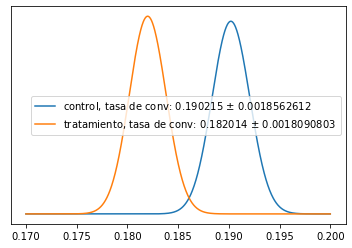

In [151]:
plot([beta_control_retention_7, beta_tratamiento_retention_7], ['control', 'tratamiento'])

In [166]:
salto_ret7=(beta_tratamiento_retention_7.mean() - beta_control_retention_7.mean())/beta_control_retention_7.mean()
salto_ret7

-0.04311526114658881

In [167]:
prob_ret7=betainc(len(tratamiento_retention_7_si), len(tratamiento_retention_7_no), 0.186, 1, regularized=True)

prob_ret7=float(prob_ret7)

In [168]:
'''El test aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto_ret7*100, prob_ret7*100)

'El test aumenta la tasa de conversion en un -4.31%, con una probabilidad del 100.00%'

In [ ]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.

#El cambio de puerta al nivel 40, disminuye la retencion a 1 y 7 dias. 